## Import data and libraries required for analysis 

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
url = 'https://raw.github.sydney.edu.au/awon6941/DATA3406_Group4/master/owid-covid-data.csv?token=AAAA7DWEKFJWE7LPAJ7ULTC7TZ7CM' 
df = pd.read_csv(url)

## Filter Data for selected countries 


In [ ]:
dfJapan = df[df['location'].str.contains("Japan")]
dfSingapore = df[df['location'].str.contains("Singapore")]
dfChina = df[df['location'].str.contains("China")]
dfItaly = df[df['location'].str.contains("Italy")]
dfMalaysia = df[df['location'].str.contains("Malaysia")]
dfPhilippines = df[df['location'].str.contains("Philippines")]

## Analysis 

### Stringency index

The stringency_index represents the "strictness" level of  governmental measures in response to the COVID-19 situation. This measure is calculated based on nine response indicators including school closures, workplace
closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest). 

## Japan's stringency index 

According to articles found, Japan has had relatively lax lockdown laws since the pandemic began. The effect of the stringency index in Japan on the number of confirmed/ death cases is analysed below. 

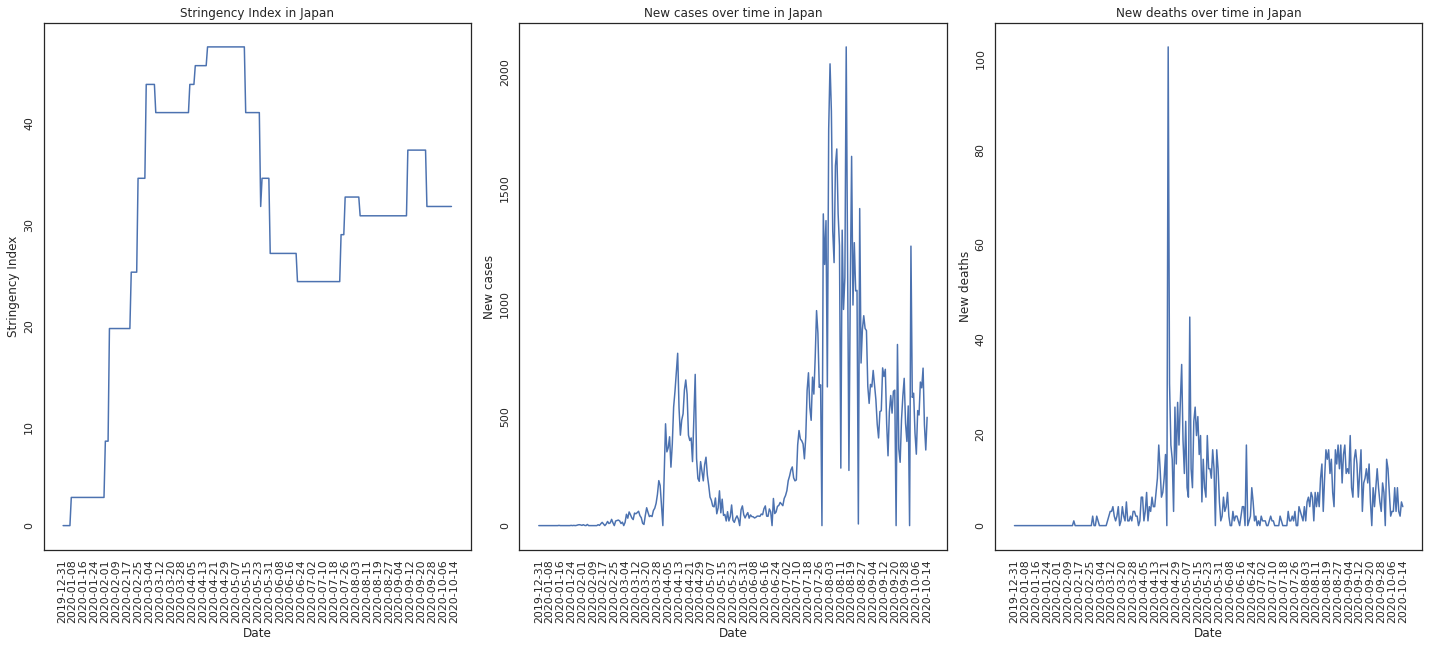

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
fig.tight_layout()

axes[0].plot(dfJapan['date'],dfJapan['stringency_index'])
axes[0].set(xlabel="Date",
       ylabel="Stringency Index",
       title="Stringency Index in Japan")
axes[0].xaxis.set_major_locator(plt.MaxNLocator(40))
axes[0].tick_params(labelrotation=90)


axes[1].plot(dfJapan['date'],dfJapan['new_cases'])
axes[1].set(xlabel="Date",
       ylabel="New cases",
       title="New cases over time in Japan")
axes[1].xaxis.set_major_locator(plt.MaxNLocator(40)) 
axes[1].tick_params(labelrotation=90)

axes[2].plot(dfJapan['date'],dfJapan['new_deaths'])
axes[2].set(xlabel="Date",
       ylabel="New deaths",
       title="New deaths over time in Japan")
axes[2].xaxis.set_major_locator(plt.MaxNLocator(40)) 
axes[2].tick_params(labelrotation=90)
plt.show()

From the trends of the plots above, it can be seen that the general trend for the stringency index and the number of death cases are similar. However, it is interesting to see that the number of death cases in the second peak is far less than the first peak despite the fact that there were more confirmed cases in the second wave than the first. 

The maximum stringency index, as well as the proportion of old people for selected countries were compared below. 

In [ ]:
dfGroup = pd.DataFrame(df,columns=['location','aged_65_older','aged_70_older','stringency_index']) 
dfGroup = dfGroup[dfGroup['location'].isin(['Japan', 'Singapore', 'China', 'Malaysia', 'Philippines'])] 
dfStringency = dfGroup.groupby(['location'])['stringency_index'].max() # group by max value
df65 = dfGroup.groupby(['location'])['aged_65_older'].max() # group by max value
df70 = dfGroup.groupby(['location'])['aged_70_older'].max() # group by max value
print(dfStringency.sort_values(ascending=True))
print(df65.sort_values(ascending=False))
print(df70.sort_values(ascending=False))

location
Japan           47.22
Malaysia        75.00
China           81.94
Singapore       85.19
Italy           93.52
Philippines    100.00
Name: stringency_index, dtype: float64
location
Japan          27.049
Italy          23.021
Singapore      12.922
China          10.641
Malaysia        6.293
Philippines     4.803
Name: aged_65_older, dtype: float64
location
Japan          18.493
Italy          16.240
Singapore       7.049
China           5.929
Malaysia        3.407
Philippines     2.661
Name: aged_70_older, dtype: float64


It can be seen above that Japan has the lowest maximum stringency index among the countries selected till date. 

On the other hand, Japan has the highest proportion of old people among the selected countries. It is also important to note that the aged_65_older and aged_70_older variables are constant for each country as seen below.

In [ ]:
## Checking if the aged_65_older variable is constant 
x = 0
for i in dfJapan["aged_65_older"]: 
  if i == 27.049:
    x = x+1

print(x)

x = 0
for i in dfJapan["aged_70_older"]: 
  if i == 18.493:
    x = x+1
print(x)

289
289


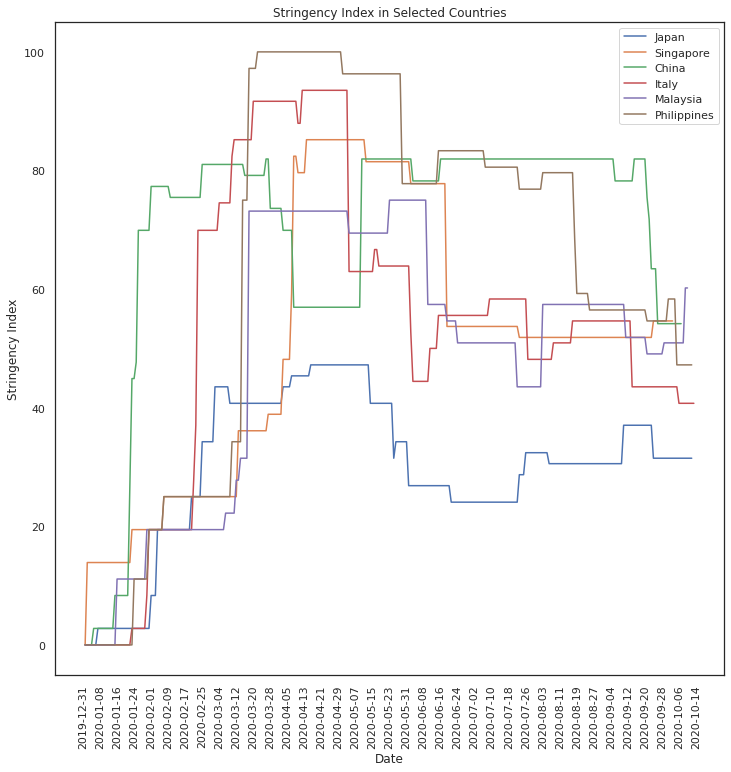

In [ ]:
# Create figure and plot space
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(dfJapan['date'], dfJapan['stringency_index'], label = "Japan")
ax.plot(dfSingapore['date'], dfSingapore['stringency_index'], label = "Singapore")
ax.plot(dfChina['date'], dfChina['stringency_index'], label = "China")
ax.plot(dfItaly['date'], dfItaly['stringency_index'], label = "Italy")
ax.plot(dfMalaysia['date'], dfMalaysia['stringency_index'], label = "Malaysia")
ax.plot(dfPhilippines['date'], dfPhilippines['stringency_index'], label = "Philippines")

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Stringency Index",
       title="Stringency Index in Selected Countries")

ax.xaxis.set_major_locator(plt.MaxNLocator(40)) #set number of ticks
plt.xticks(rotation=90)
plt.legend()

plt.show()

From the plot above, it can be shown that the stringency index for Japan has been consistently lower than the selected countries. 

In [ ]:
#Extract Asian data
asia = df[df['continent']==("Asia")]

# Create line graph
new_deaths_asia = px.line(asia,
                 x = 'date',
                 y = 'new_deaths',
                 color = 'location',
                 labels={'location' : "Country",
                         'date': "Date",
                         'new_deaths': "New Deaths"},
                 title="New Death Cases for Countries in Asia")

new_deaths_asia.show()

After careful investigation, it is seen that Japan has a relatively low death rate among the countries in Asia. 

It is also noted that Kyrgyzstan reported negative death cases on 24 August 2020, suggesting that there may have been invalid numbers reported in this dataset. 

In [ ]:
# Create line graph
new_tests_asia = px.line(asia,
                 x = 'date',
                 y = 'new_tests',
                 color = 'location',
                 labels={'location' : "Country",
                         'date': "Date",
                         'new_tests': "New Tests"},
                 title="New Tests for Countries in Asia")

new_tests_asia.show()

After investigating the number of tests conducted in the countries in Asia, it was first noted that the number of tests conducted before 27 September 2020 (date is found from plot below) were not reported in this dataset. 

It is also noted that there were a lot of missing values for the new_tests variable, which is a limitation to this dataset. 

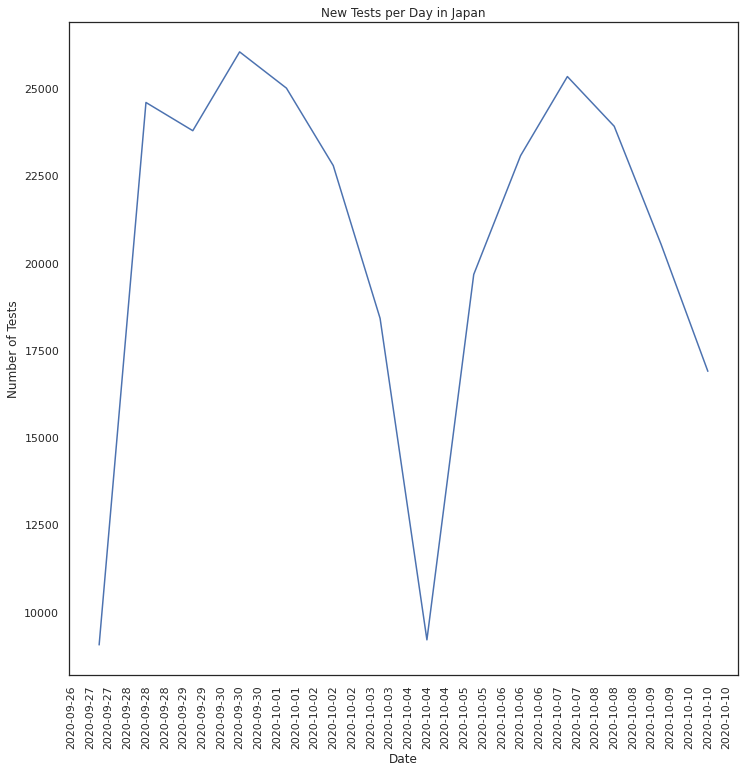

In [ ]:
# Create figure and plot space
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(dfJapan['date'], dfJapan['new_tests'])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of Tests",
       title="New Tests per Day in Japan")

ax.xaxis.set_major_locator(plt.MaxNLocator(40)) #set number of ticks
plt.xticks(rotation=90)


plt.show()
